## Objectifs

Notre objectif est celui de predire le status d'une appel en tenant compte des caracteristiques qui pour nous, nous ont semblé importants

Nous pensons que les attributs importants qui nous permettrons d'atteindre l'objectif fixé sont les colonnes TEARDOWN, DURATION et PDD

## chargement et visualisation de donnees 

In [32]:
import pandas as pd 

data = pd.read_excel('CDR_For_Analysis.xlsx')
data

,TIMESTAMP,TO,FROM,DURATION,TEARDOWN,PDD
0,2016-02-24 00:01:31,1.123770e+13,33681758465,0,403,0
1,2016-02-24 00:01:37,1.123770e+13,3022353644,0,403,0
2,2016-02-24 00:01:38,1.123766e+13,33681757625,0,403,0
3,2016-02-24 00:01:36,1.123770e+13,32465977443,0,503,2000
4,2016-02-24 00:01:39,1.123770e+13,32465977443,0,503,1000
...,...,...,...,...,...,...
27951,2016-02-24 23:59:29,1.123799e+12,34649419583,0,503,5000
27952,2016-02-24 23:59:46,1.123766e+13,33681546494,0,403,0
27953,2016-02-24 23:59:57,1.123766e+13,33681543744,0,403,0
27954,2016-02-25 00:00:00,1.123770e+13,33681758465,0,403,0


In [33]:
data.shape

(27956, 6)

In [34]:
data.describe()

,TO,DURATION,TEARDOWN,PDD
count,2.795600e+04,27956.000000,27956.000000,27956.000000
mean,2.054619e+17,11.304121,452.548254,1605.588460
std,1.502933e+19,76.353575,117.583734,1509.159994
min,1.123769e+06,0.000000,0.000000,0.000000
25%,1.123766e+13,0.000000,403.000000,1000.000000
50%,1.123770e+13,0.000000,503.000000,1000.000000
75%,1.123770e+13,0.000000,503.000000,2000.000000
max,1.123770e+21,2001.000000,503.000000,26000.000000


- on verifie s'il ya des attributs parmis ceux importants avec des valeurs manquantes

In [35]:
import numpy as np
np.unique(data['TEARDOWN'])

array([  0, 403, 487, 488, 491, 503])

In [36]:
data['PDD'][data['PDD'].isna()]

Series([], Name: PDD, dtype: int64)

In [37]:
np.unique(data['PDD'])

array([    0,   813,   817, ..., 17000, 25000, 26000])

In [38]:
data['DURATION'][data['DURATION'].isna()]

Series([], Name: DURATION, dtype: int64)

In [39]:
np.unique(data['DURATION'])

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
         77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
         88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
         99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
        110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,
        121,  122,  123,  124,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  1

- on visualise les donnees( l'axe des x etant decrivant la duree de l'appel et l'axe des y decrivant le PDD)

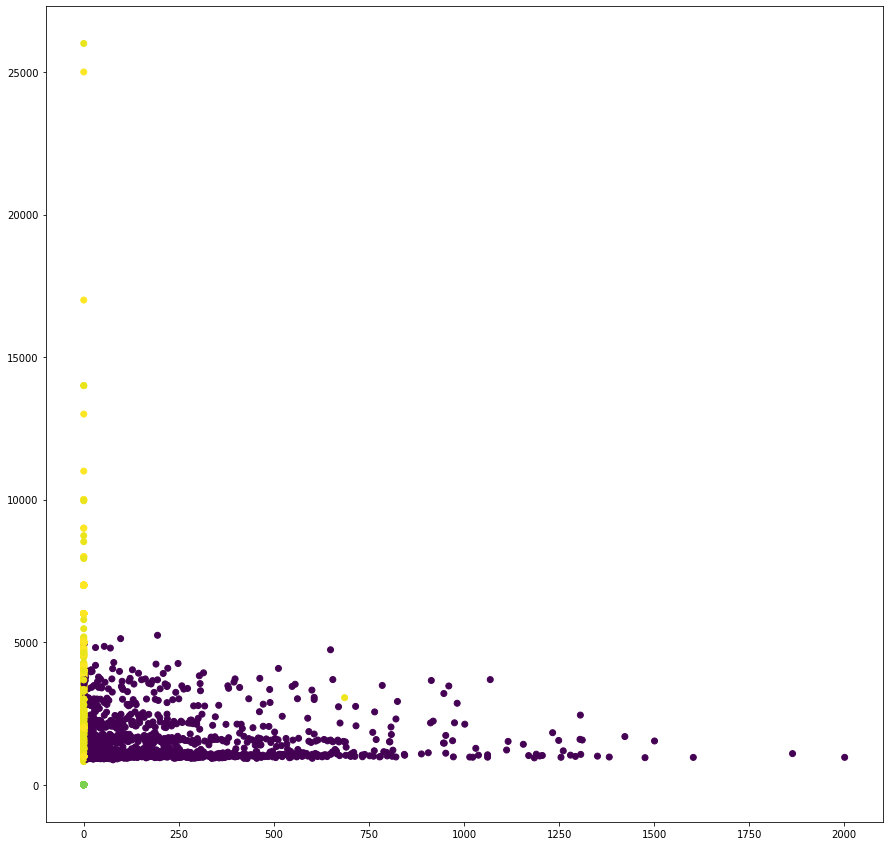

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
plt.scatter(data['DURATION'],data['PDD'], c=data['TEARDOWN'])


de ce graphe nous pouvons conclure que les donnees ne sont pas lineairement separable 

## pretraitement

* on supprime les autres colonnes

In [41]:
data = data[['DURATION', 'PDD', 'TEARDOWN']]

- on normalise les donnees 

In [42]:
data['DURATION'] = (data['DURATION'] - data['DURATION'].mean())/data['DURATION'].std()

/tmp/ipykernel_5653/3655175686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DURATION'] = (data['DURATION'] - data['DURATION'].mean())/data['DURATION'].std()


In [43]:
data['PDD'] = (data['PDD'] - data['PDD'].mean())/data['PDD'].std()

/tmp/ipykernel_5653/1105183098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PDD'] = (data['PDD'] - data['PDD'].mean())/data['PDD'].std()


- on recupere les valeurs utiles

In [44]:
from sklearn.model_selection import train_test_split 

data_used = data[['DURATION', 'PDD']].values
labels_used = data['TEARDOWN'].values

- on effectue la methode holdout

In [45]:
# pour ne plus tenir compte de l'ordre d'enregistrement, on fait du melange grace a l'attribut shuffle nqui est mis a True par defaut
X_train, X_test, y_train, y_test = train_test_split( data_used, labels_used, train_size=0.8, test_size=0.2)

## entrainement 

vue que le nombre d'observations utilisables est de 27956, alors on ne pourrai utilisé les reseaux de neuronnes (car c'est encore beaucoup trop peu).

Et donc les modeles qui se presnte face a nous sont :
* le modele de Baiyes 
* le modele svm 

mais comme les caracteristiques ne sont pas forcement independantes alors le meilleure choix de modele a utulisé est un modele svm

In [46]:
from libsvm.svmutil import svm_save_model, svm_load_model, svm_predict, svm_train

Vue que nous voulons au mieux predire les status il est donc important pour nous de ne pas utilisé le modele svm a marge souple

Et vue les donnees ne sont pas lineairement separable nous pouvons conclure que le modele adapté est le modele svm a fonction noyau

Nous avons choisi noyau la plus communement utilisé ( d'apres quelques lectures sur le sujet ) qui est la fonction polynomiale de 

In [47]:
model_svm = svm_train(y_train, X_train, "-s 0 -t 1 -d 2 -r 1")
svm_save_model("model_svm_a_fonction_noyau", model_svm)

...........
*
optimization finished, #iter = 11151
nu = 0.362252
obj = -6041.955965, rho = -0.999931
nSV = 6047, nBSV = 6033
*
optimization finished, #iter = 118
nu = 0.009560
obj = -168.743713, rho = -2.132974
nSV = 175, nBSV = 172
*
optimization finished, #iter = 232
nu = 0.018768
obj = -211.760418, rho = 0.739216
nSV = 297, nBSV = 271
*
optimization finished, #iter = 21
nu = 0.001025
obj = -11.907931, rho = -1.916838
nSV = 15, nBSV = 13
*
optimization finished, #iter = 309
nu = 0.042081
obj = -307.689688, rho = -2.304553
nSV = 313, nBSV = 310
*
optimization finished, #iter = 229
nu = 0.065117
obj = -211.760490, rho = 0.739151
nSV = 319, nBSV = 273
*
optimization finished, #iter = 15
nu = 0.004624
obj = -14.000000, rho = -1.000000
nSV = 14, nBSV = 14
*
optimization finished, #iter = 96
nu = 0.027122
obj = -139.386540, rho = 1.630929
nSV = 156, nBSV = 153
*
optimization finished, #iter = 7
nu = 0.003183
obj = -14.000000, rho = -1.000000
nSV = 14, nBSV = 14
*
optimization finished, #it

## prediction et evaluation 

In [48]:
model_svm = svm_load_model("model_svm_a_fonction_noyau")
ypred,_,_ = svm_predict(y_test, X_test, model_svm)

Accuracy = 86.0694% (4813/5592) (classification)


In [54]:
def transform_dataframe(mat, etiquettes):
    p = pd.DataFrame(mat , columns = etiquettes)
    p.index = etiquettes
    return p

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, precision_recall_curve, recall_score

etiquetes = np.unique(labels_used)
gr = confusion_matrix(y_test, ypred, labels= etiquetes)

In [60]:
transform_dataframe(gr, etiquetes)

,0,403,487,488,491,503
0,292,0,0,0,0,9
403,0,1108,0,0,0,17
487,0,17,0,0,0,733
488,0,1,0,0,0,0
491,1,0,0,0,0,0
503,0,1,0,0,0,3413


* tableau d'evaluation

In [77]:
def transform_matrice(V):
    df = pd.DataFrame({'value': V},
                      index = ['exactitude', 'precision', 'rappel' ])
    return df
q = transform_matrice([accuracy_score(y_test,ypred) , precision_score(y_test,ypred, average="macro") , recall_score(y_test,ypred, average="macro") ])

/home/mbe/Bureau/DS/python/easylocalenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
q

,value
exactitude,0.860694
precision,0.466300
rappel,0.492449


## interpretation

de part le tableau d'evaluation on peut donc se rentre compte que le modele n'est pas performant. la source peut venir du faite que les paramettres de la fonction noyau ne sont pas bien pris 
et qu'il faut augmenter le degre du polynome (et eventuellement la constance ) ce qui conduira a augmenter la dimention dans laquelle on separe les donnees lineairement separable